<a href="https://colab.research.google.com/github/mslisboa/ProjetoU9T3/blob/main/projeto_de_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
!pip install skimpy==0.0.7

In [ ]:
pip install plotnine

In [ ]:
pip install seaborn matplotlib

In [ ]:
pip install pingouin

In [ ]:
!pip install numpy statsmodels scikit-learn


In [ ]:
!pip install --upgrade pandas scikit-learn joblib


In [ ]:
!curl -L -o /content/archive.zip https://www.kaggle.com/api/v1/datasets/download/surajjha101/top-instagram-influencers-data-cleaned

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  6035  100  6035    0     0  13182      0 --:--:-- --:--:-- --:--:-- 13182


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving top_insta_influencers_data.csv to top_insta_influencers_data.csv


# Análise exploratória e preparação dos dados

In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/top_insta_influencers_data.csv')

print(dataset.head())

   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  


In [ ]:
from skimpy import skim

# Função para converter valores com k, m, b e % para float
def convert_to_number(value):
    if isinstance(value, str):
        if "k" in value:
            return float(value.replace("k", "")) * 1e3
        elif "m" in value:
            return float(value.replace("m", "")) * 1e6
        elif "b" in value:
            return float(value.replace("b", "")) * 1e9
        elif "%" in value:
            return float(value.replace("%", "")) / 100
    return value

columns_to_convert = ["posts", "followers", "avg_likes", "new_post_avg_like", "total_likes", "60_day_eng_rate"]

for col in columns_to_convert:
    if col in dataset.columns:
        dataset[col] = pd.to_numeric(dataset[col].apply(convert_to_number), errors='coerce')

# Análise exploratória com skimpy
print(skim(dataset))

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 200    │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 10     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃    ┃      ┃            ┃            ┃          ┃            ┃            ┃           ┃        ┃  │
│ ┃ e          ┃ NA ┃ NA % ┃ mean       ┃ sd         ┃ p0       ┃ p25        ┃ p75        ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ rank       │  0 │    0 │        100 │         58 │        1 │         51 │        150 │       200 │ ██████ │  │
│ │ influence_ │  0 │    0 │         82 │        8.9 │       22 │         80 │         86 │        93 │     ▃█ │  │
│ │ score      │    │      │            │            │          │            │            │           │        │  │
│ │ posts      │  0 │    0 │       3500 │       3500 │       10 │        950 │       5000 │     18000 │  █▃▁▁  │  │
│ │ followers  │  0 │    0 │   77000000 │   74000000 │ 33000000 │   40000000 │   69000000 │ 480000000 │   █▁   │  │
│ │ avg_likes  │  0 │    0 │    1800000 │    2200000 │    65000 │     500000 │    2100000 │  15000000 │   █▁   │  │
│ │ 60_day_eng │  1 │  0.5 │      0.019 │      0.033 │   0.0001 │     0.0041 │       0.02 │      0.26 │   █    │  │
│ │ _rate      │    │      │            │            │          │            │            │           │        │  │
│ │ new_post_a │  0 │    0 │    1200000 │    1900000 │        0 │     200000 │    1300000 │  13000000 │  █▁▁   │  │
│ │ vg_like    │    │      │            │            │          │            │            │           │        │  │
│ │ total_like │  0 │    0 │ 3700000000 │ 5600000000 │ 18000000 │ 1000000000 │ 3900000000 │ 570000000 │   █▁   │  │
│ │ s          │    │      │            │            │          │            │            │        00 │        │  │
│ └────────────┴────┴──────┴────────────┴────────────┴──────────┴────────────┴────────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ channel_info               │      0 │          0 │                            1 │                      200 │  │
│ │ country                    │     62 │         31 │                            1 │                      200 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── 

None


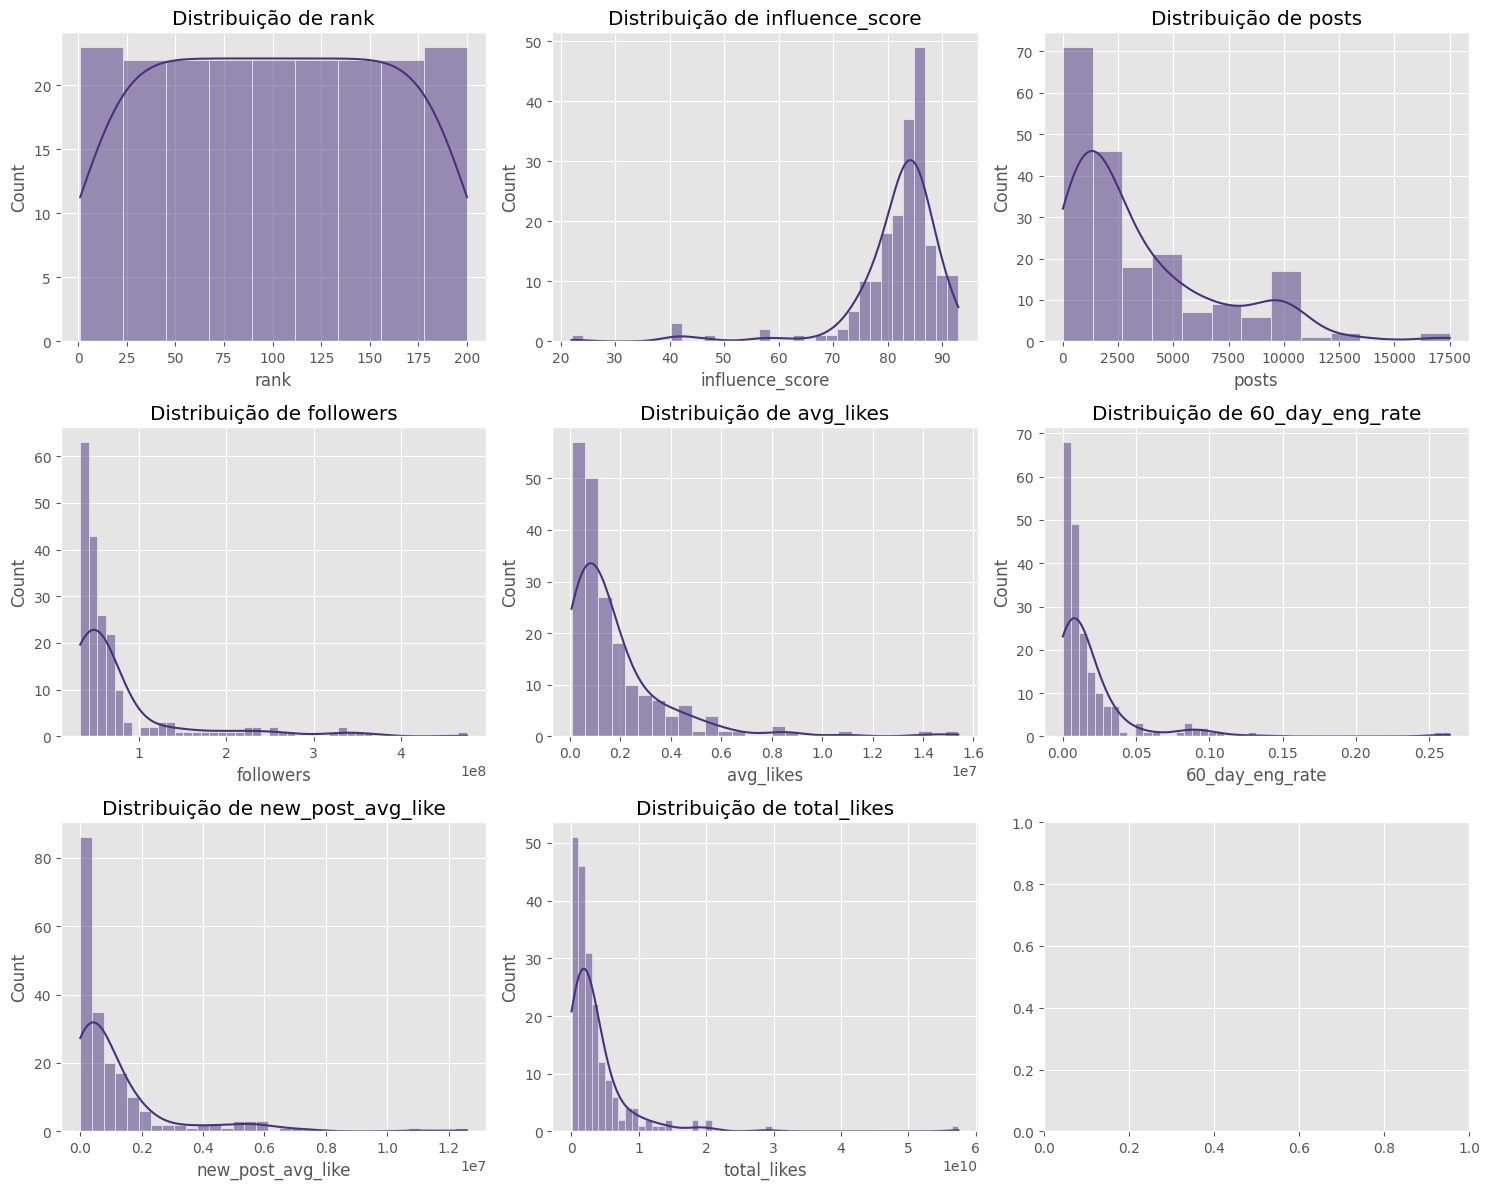

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_columns = dataset.select_dtypes(include=["float", "int"]).columns

plt.style.use('ggplot')
sns.set_palette('viridis')


fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for i, col in enumerate(numeric_columns):
    sns.histplot(dataset[col], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribuição de {col}')


plt.tight_layout()
plt.show()


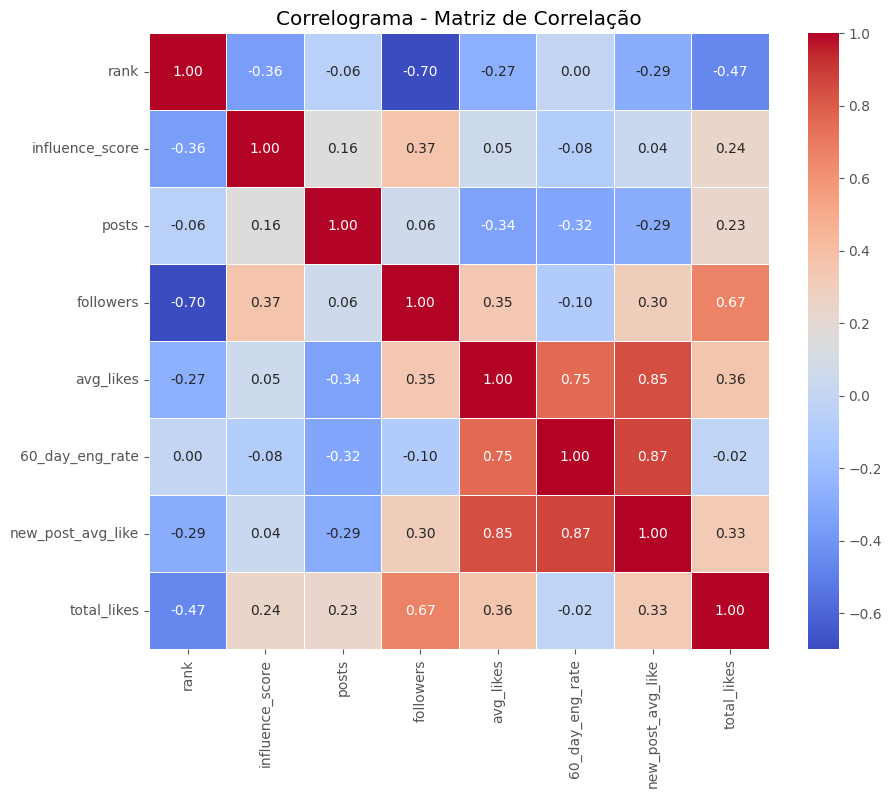

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlação
# Changed from numeric_columns.corr() to dataset[numeric_columns].corr()
# This ensures we're calculating the correlation on the DataFrame, not the column names
correlation_matrix = dataset[numeric_columns].corr()

# Plotar correlograma
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlograma - Matriz de Correlação")
plt.show()

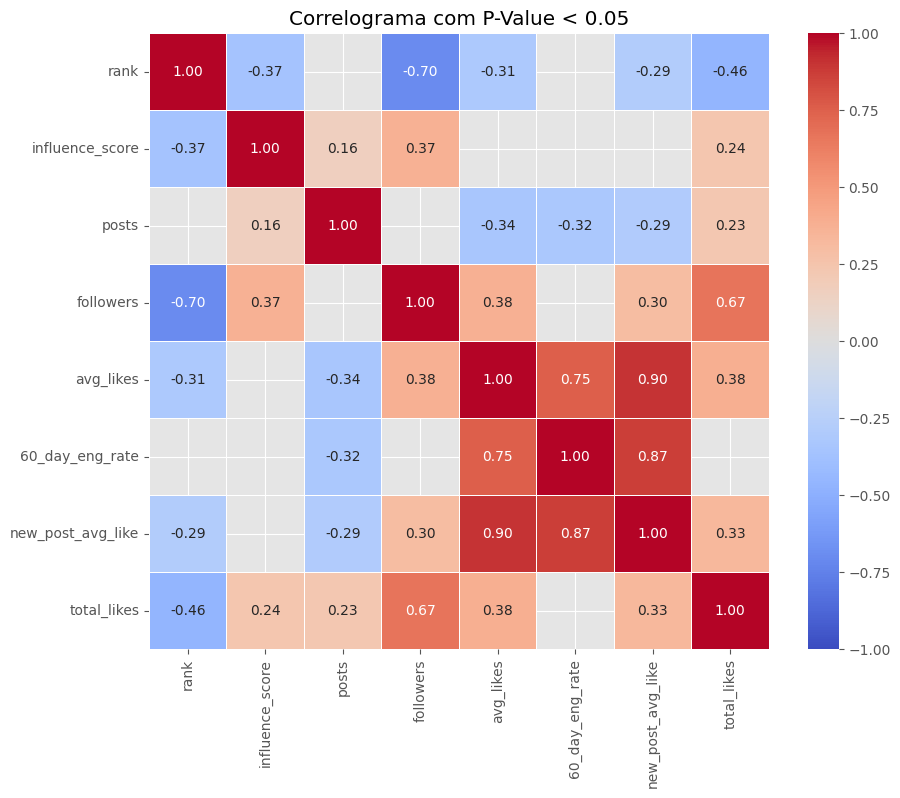

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Função para calcular matriz de correlação e p-valores
def correlation_with_pvalues(data):
    numeric_cols = data.select_dtypes(include=["float", "int"])

    # Tratar NaNs e infs (remover linhas com valores inválidos)
    numeric_cols = numeric_cols.replace([np.inf, -np.inf], np.nan).dropna()

    cols = numeric_cols.columns
    corr_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)
    pval_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)

    for col1 in cols:
        for col2 in cols:
            corr, pval = pearsonr(numeric_cols[col1], numeric_cols[col2])
            corr_matrix.loc[col1, col2] = corr
            pval_matrix.loc[col1, col2] = pval

    return corr_matrix, pval_matrix

# Calcular matriz de correlação e p-valores
correlation_matrix, pvalue_matrix = correlation_with_pvalues(dataset)

# Aplicar máscara para p-valores > 0.05 (não significativos)
mask = pvalue_matrix > 0.05
filtered_corr_matrix = correlation_matrix.mask(mask)

# Plotar o correlograma
plt.figure(figsize=(10, 8))
sns.heatmap(
    filtered_corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5
)
plt.title("Correlograma com P-Value < 0.05")
plt.show()


# Modelo de Regressão Lienar

In [ ]:
# Selecionar apenas colunas numéricas
numeric_dataset = dataset.select_dtypes(include=np.number)

# Remover linhas com valores nulos
numeric_dataset = numeric_dataset.dropna()

print(numeric_dataset.head())

   rank  influence_score   posts    followers  avg_likes  60_day_eng_rate  \
0     1               92  3300.0  475800000.0  8700000.0           0.0139   
1     2               91  6900.0  366200000.0  8300000.0           0.0162   
2     3               90   890.0  357300000.0  6800000.0           0.0124   
3     4               93  1800.0  342700000.0  6200000.0           0.0097   
4     5               91  6800.0  334100000.0  1900000.0           0.0020   

   new_post_avg_like   total_likes  
0          6500000.0  2.900000e+10  
1          5900000.0  5.740000e+10  
2          4400000.0  6.000000e+09  
3          3300000.0  1.150000e+10  
4           665300.0  1.250000e+10  


In [ ]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Separar a variável dependente (taxa de engajamento) e as independentes
y = numeric_dataset["60_day_eng_rate"]
X = numeric_dataset.drop(columns=["60_day_eng_rate"])

# Dividir os dados em treino (60%) e teste (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
# Normalização (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Regressão Linear simples
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Previsões
y_pred = linear_model.predict(X_test_scaled)

# Avaliação do modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

R²: 0.9058117425999469
MSE: 0.00012109380127432921
MAE: 0.006574153887094328


In [ ]:
# Função de custo
def compute_cost(X, y, weights):
    n = len(y)
    predictions = X @ weights
    cost = (1 / (2 * n)) * np.sum((predictions - y) ** 2)
    return cost

# Gradiente descendente
def gradient_descent(X, y, weights, learning_rate, epochs):
    n = len(y)
    cost_history = []

    for i in range(epochs):
        predictions = X @ weights
        gradients = (1 / n) * (X.T @ (predictions - y))
        weights -= learning_rate * gradients
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

# Configuração
X_train_manual = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]  # Adicionar bias (1s)
X_test_manual = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
weights = np.zeros(X_train_manual.shape[1])  # Inicializar pesos
learning_rate = 0.01
epochs = 1000

# Treinamento
final_weights, cost_history = gradient_descent(X_train_manual, y_train.values, weights, learning_rate, epochs)

# Previsões e avaliação
y_pred_gd = X_test_manual @ final_weights
r2_gd = r2_score(y_test, y_pred_gd)
mse_gd = mean_squared_error(y_test, y_pred_gd)
mae_gd = mean_absolute_error(y_test, y_pred_gd)

print(f"Gradiente Descendente -> R²: {r2_gd}, MSE: {mse_gd}, MAE: {mae_gd}")

Gradiente Descendente -> R²: 0.8990388597652824, MSE: 0.00012980140613585316, MAE: 0.007424701290340831


In [ ]:
# Ridge (L2)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Lasso (L1)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Avaliação Ridge
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"Ridge -> R²: {r2_ridge}, MSE: {mse_ridge}, MAE: {mae_ridge}")

# Avaliação Lasso
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"Lasso -> R²: {r2_lasso}, MSE: {mse_lasso}, MAE: {mae_lasso}")

Ridge -> R²: 0.9054470839241444, MSE: 0.00012156262728767208, MAE: 0.006595739542724935
Lasso -> R²: -0.03046403122893393, MSE: 0.0013248233916037006, MAE: 0.018503655462184875


In [ ]:
from sklearn.model_selection import cross_val_score

# Validação cruzada para Ridge
cv_ridge = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring="r2")
print(f"Validação Cruzada (Ridge) -> R² médio: {cv_ridge.mean()}")

# Validação cruzada para Lasso
cv_lasso = cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring="r2")
print(f"Validação Cruzada (Lasso) -> R² médio: {cv_lasso.mean()}")

Validação Cruzada (Ridge) -> R² médio: 0.7331595749266949
Validação Cruzada (Lasso) -> R² médio: -0.17225166172218823



    Regressão Linear:
        R² (0.9058): Excelente desempenho, indicando que o modelo explica 90,58% da variabilidade dos dados.
        MSE (0.000121) e MAE (0.00657): Os erros são mínimos, o que demonstra alta precisão.

    Gradiente Descendente:
        R² (0.8990): Quase equivalente ao método de regressão linear, confirmando um bom ajuste.
        MSE (0.000129) e MAE (0.00742): Valores ligeiramente maiores que o método de regressão linear, mas ainda muito próximos, destacando que este método também é confiável.

    Ridge:
        R² (0.9054): Performance praticamente idêntica à regressão linear, confirmando que a regularização Ridge foi eficiente sem sacrificar a capacidade preditiva.
        MSE (0.000121) e MAE (0.00659): Os valores são quase indistinguíveis da regressão linear.

    Lasso:
        R² (-0.0304): Resultado muito ruim, com um valor negativo indicando que o modelo não conseguiu capturar a relação entre as variáveis.
        MSE (0.001324) e MAE (0.0185): Erros significativamente maiores, confirmando o baixo desempenho do modelo.

Conclusão

    Melhor Método: Regressão Linear, Gradiente Descendente e Ridge têm desempenho semelhante, com Regressão Linear ligeiramente superior.
    Pior Método: Lasso apresentou um ajuste muito fraco, possivelmente devido ao excesso de regularização (L1), o que eliminou variáveis importantes do modelo.
    Escolha Final: A regressão linear padrão ou Ridge (para evitar overfitting em dados futuros) são os mais indicados. ​

​

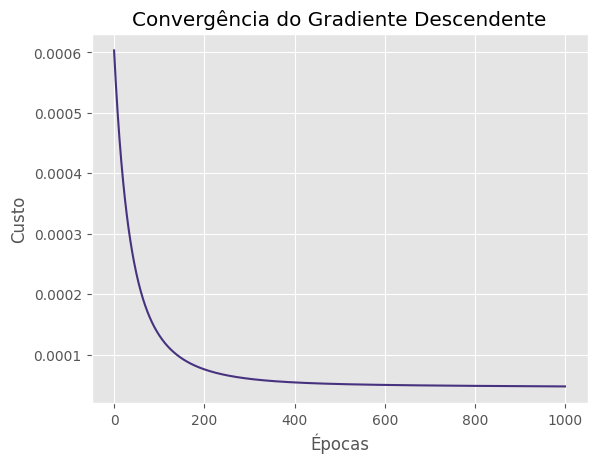

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), cost_history)
plt.xlabel("Épocas")
plt.ylabel("Custo")
plt.title("Convergência do Gradiente Descendente")
plt.show()

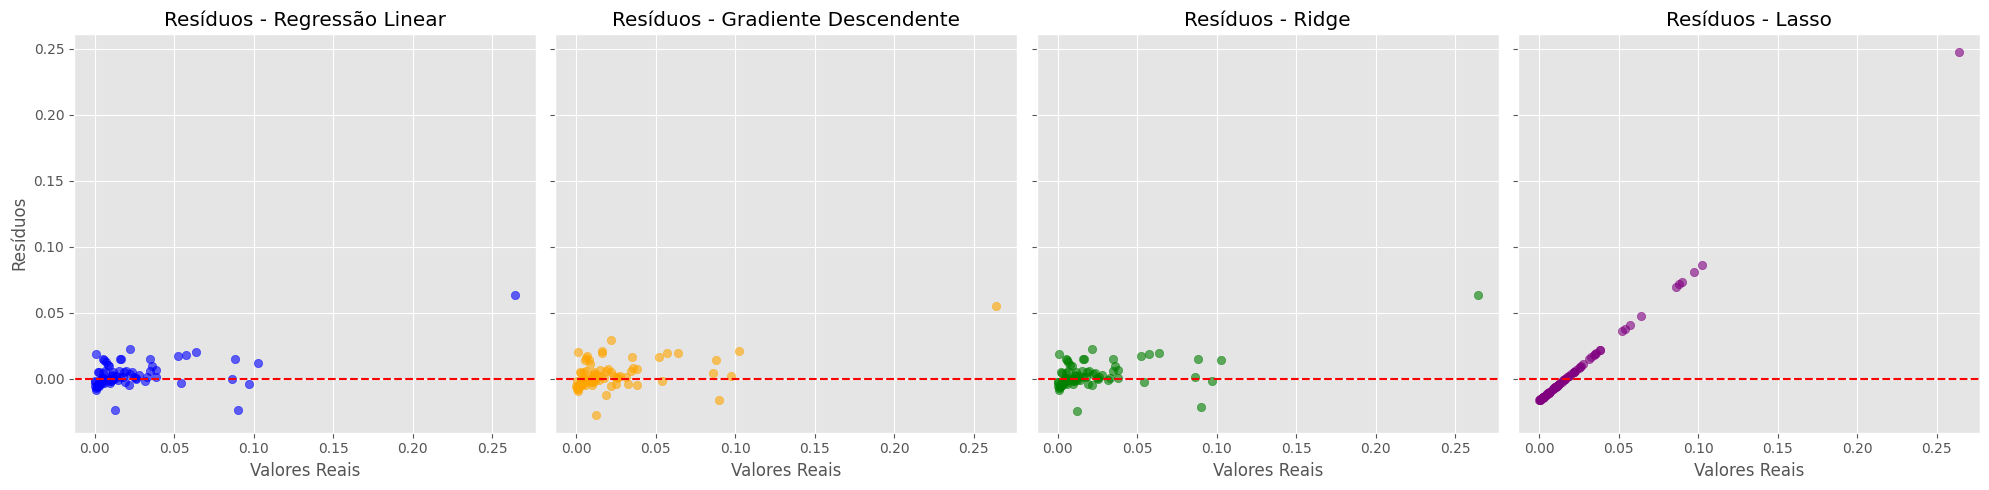

In [ ]:
import matplotlib.pyplot as plt

# Calcular resíduos para cada método
residuals_linear = y_test - y_pred
residuals_gd = y_test - y_pred_gd
residuals_ridge = y_test - y_pred_ridge
residuals_lasso = y_test - y_pred_lasso

# Criar os subplots lado a lado
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Gráfico de resíduos - Regressão Linear
axs[0].scatter(y_test, residuals_linear, color="blue", alpha=0.6)
axs[0].axhline(y=0, color="r", linestyle="--")
axs[0].set_title("Resíduos - Regressão Linear")
axs[0].set_xlabel("Valores Reais")
axs[0].set_ylabel("Resíduos")

# Gráfico de resíduos - Gradiente Descendente
axs[1].scatter(y_test, residuals_gd, color="orange", alpha=0.6)
axs[1].axhline(y=0, color="r", linestyle="--")
axs[1].set_title("Resíduos - Gradiente Descendente")
axs[1].set_xlabel("Valores Reais")

# Gráfico de resíduos - Ridge
axs[2].scatter(y_test, residuals_ridge, color="green", alpha=0.6)
axs[2].axhline(y=0, color="r", linestyle="--")
axs[2].set_title("Resíduos - Ridge")
axs[2].set_xlabel("Valores Reais")

# Gráfico de resíduos - Lasso
axs[3].scatter(y_test, residuals_lasso, color="purple", alpha=0.6)
axs[3].axhline(y=0, color="r", linestyle="--")
axs[3].set_title("Resíduos - Lasso")
axs[3].set_xlabel("Valores Reais")

# Ajustar o layout
plt.tight_layout()
plt.show()


Explicação Detalhada dos Gráficos de Resíduos

Os gráficos de resíduos mostram a diferença entre os valores reais da variável dependente e os valores previstos pelo modelo. O eixo X representa os valores reais, enquanto o eixo Y representa os resíduos (erros).

    Resíduos da Regressão Linear
        Os resíduos estão próximos de zero e não mostram um padrão específico, o que indica que o modelo se ajusta bem aos dados.
        Não há evidências de heterocedasticidade (a dispersão dos resíduos é uniforme), o que sugere que a variância dos erros é constante.

    Resíduos do Gradiente Descendente
        O padrão dos resíduos é semelhante ao da Regressão Linear, o que confirma que este método alcançou um ajuste similar.
        Pequenas dispersões em torno de zero são observadas, mas a performance geral é boa.

    Resíduos do Ridge
        Os resíduos também estão próximos de zero e mostram uma dispersão uniforme, como nos dois modelos anteriores.
        A regularização Ridge manteve o ajuste bem equilibrado sem overfitting.

    Resíduos do Lasso
        Há um comportamento incomum nos resíduos, com muitos valores mais afastados de zero.
        Isso ocorre porque o modelo Lasso não conseguiu capturar bem as relações nos dados, resultando em um ajuste inadequado. A dispersão e os padrões nos resíduos são claros sinais disso.

# Análises extras

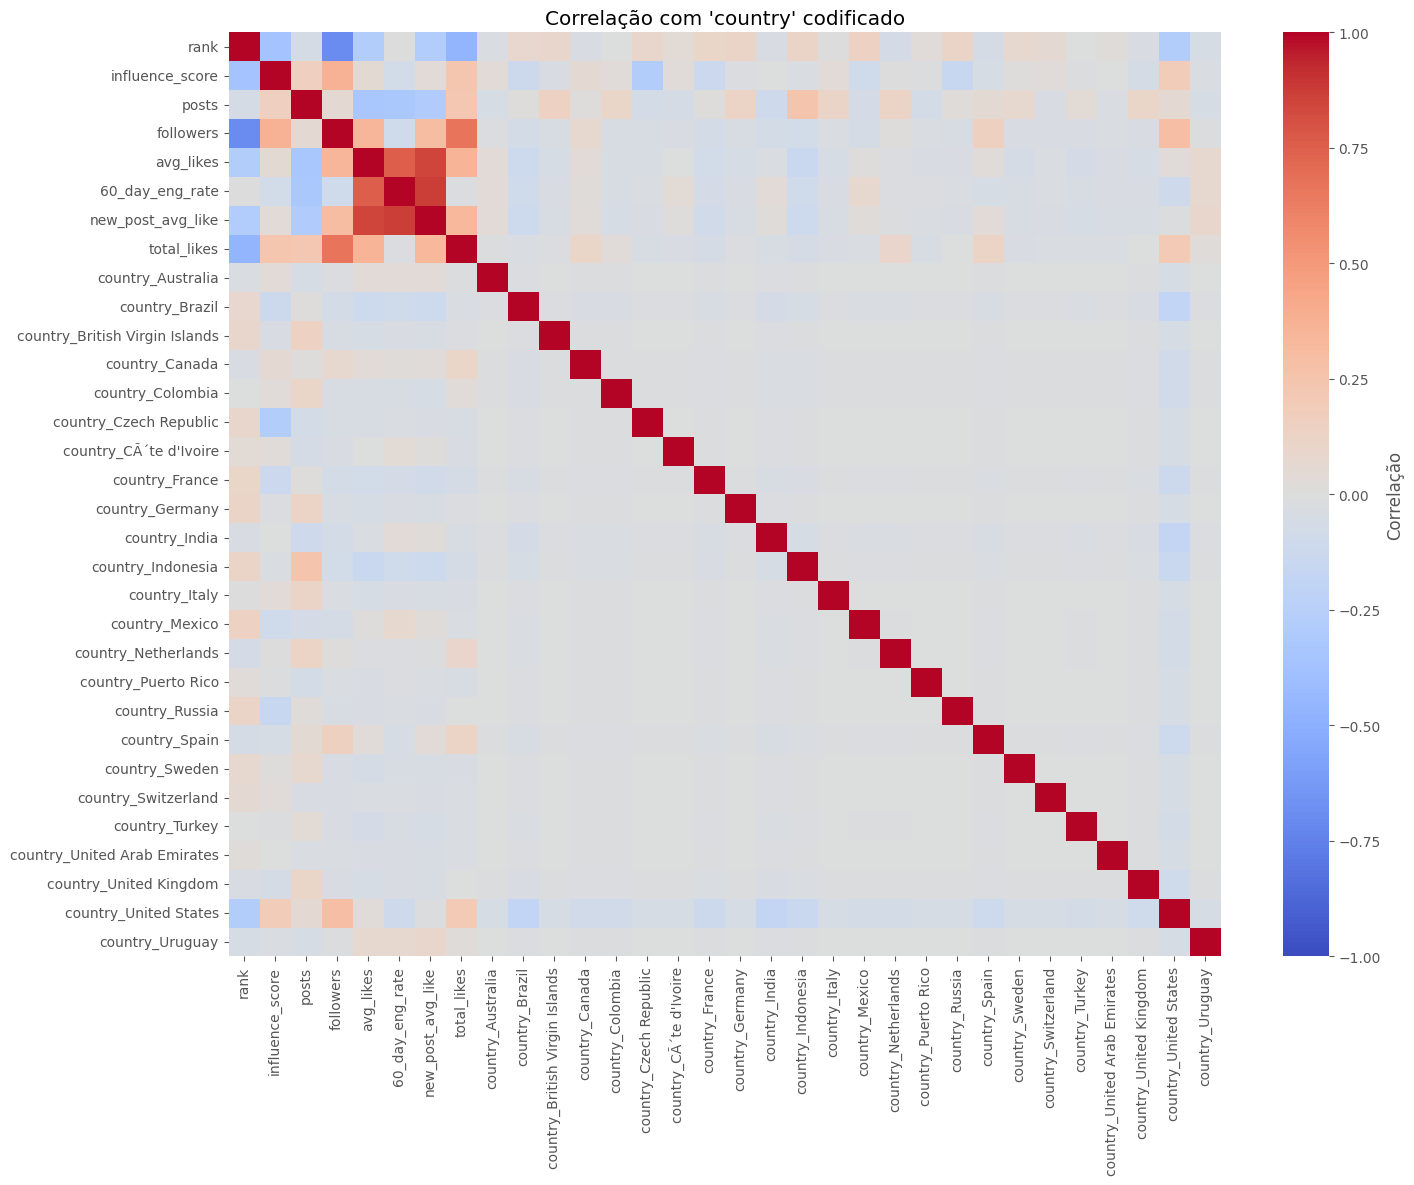

In [ ]:
# Remover a coluna 'channel_info'
dataset_cleaned = dataset.drop(columns=['channel_info'])

# Codificar a coluna 'country' usando One-Hot Encoding
dataset_encoded = pd.get_dummies(dataset_cleaned, columns=['country'], drop_first=True)

# Calcular a matriz de correlação
correlation_matrix = dataset_encoded.corr()

# Plotar o gráfico de correlação
plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Correlação'},
)
plt.title("Correlação com 'country' codificado")
plt.show()

Fizemos a análise se seria significativo adicionar a coluna country nas análises, como é uma variável categorica (string) fizemos um tratamento de One-Hot Encoding, transformando cada ocorrência de país em uma nova coluna binária que indicaria a ocorrencia do país para cada linha. Além da coluna country não ser muito relevante para colinearidade do dataset em geral, o aumento de dimensionalidade eleva muito os custos do modelo.

Não foi utilizada a técnica de atribuir um código numérico para cada país de maneira ordinal pois isso criaria um padrão sintético nos dados que não iria refletir a realidade, como se estivessemos "rankeando" os países.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleção das features para o modelo
features = numeric_dataset[['new_post_avg_like', 'posts', 'avg_likes']]

# Cálculo do VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

print(vif_data)

             Feature       VIF
0  new_post_avg_like  7.437182
1              posts  1.091509
2          avg_likes  7.655059


Fizemos a análise de multicolinearidade com as features que mais se correlacionavam com o target, como o resultado não foi satisfatório preferimos testar os modelos com todas as colunas.

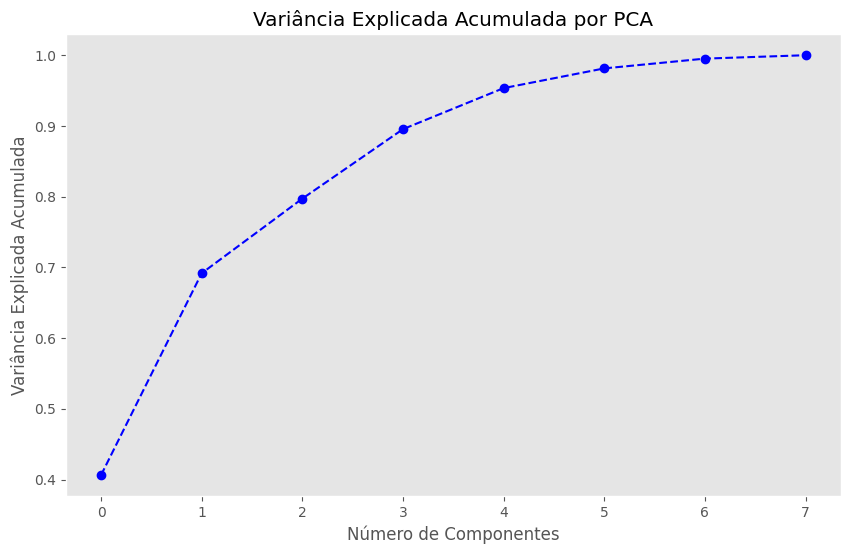

Componente 1: Variância explicada = 40.62%
Componente 2: Variância explicada = 28.55%
Componente 3: Variância explicada = 10.55%
Componente 4: Variância explicada = 9.82%
Componente 5: Variância explicada = 5.81%
Componente 6: Variância explicada = 2.79%
Componente 7: Variância explicada = 1.38%
Componente 8: Variância explicada = 0.48%


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,7.176908,-3.532139,0.650428,-1.717762,1.976821,1.404197,0.055357,0.445997
1,7.947677,-5.171413,3.547708,-2.286410,4.209587,-2.098922,-0.111609,-0.070437
2,4.258655,-1.532252,-1.342769,-0.803314,-0.114736,2.072764,0.501942,0.429294
3,4.059332,-2.259272,-0.993589,-0.710620,0.435794,1.395244,0.462611,0.006504
4,2.043062,-3.614301,-0.120445,-0.585413,-0.046669,1.149099,-0.512643,-0.722191


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Garantir que os dados não tenham valores nulos
numeric_dataset_cleaned = numeric_dataset.dropna()

# Normalizar os dados
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_dataset_cleaned)

# Aplicar PCA
pca = PCA()
pca_components = pca.fit_transform(normalized_data)

# Explicação da variância por componente
explained_variance_ratio = pca.explained_variance_ratio_

# Plotar a variância explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(
    np.cumsum(explained_variance_ratio),
    marker='o',
    linestyle='--',
    color='b',
)
plt.title('Variância Explicada Acumulada por PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.grid()
plt.show()

# Mostrar a variância explicada por cada componente
for i, var in enumerate(explained_variance_ratio):
    print(f"Componente {i + 1}: Variância explicada = {var:.2%}")

# Criar um dataframe para os componentes principais
pca_df = pd.DataFrame(
    data=pca_components,
    columns=[f"PC{i + 1}" for i in range(pca_components.shape[1])],
)

# Mostrar as primeiras linhas do dataframe
pca_df.head()


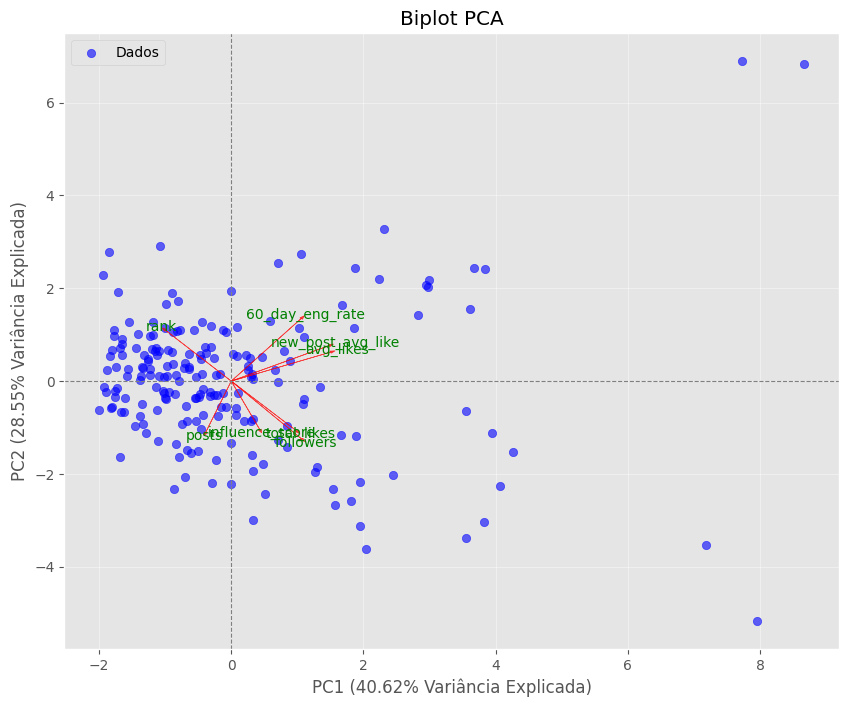

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pca_biplot(pca, components, feature_names):
    """
    Função para plotar o biplot do PCA.
    Args:
        pca: modelo PCA ajustado.
        components: valores dos componentes principais (transformados).
        feature_names: nomes das variáveis originais.
    """
    plt.figure(figsize=(10, 8))

    # Plotar os dados transformados nos dois primeiros componentes principais
    plt.scatter(components[:, 0], components[:, 1], alpha=0.6, c='b', label="Dados")

    # Adicionar vetores de *loadings* (contribuições das variáveis)
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0,
                  pca.components_[0, i] * 3,
                  pca.components_[1, i] * 3,
                  color='r', alpha=0.7, head_width=0.05)
        plt.text(pca.components_[0, i] * 3.2,
                 pca.components_[1, i] * 3.2,
                 feature, color='g', ha='center', va='center', fontsize=10)

    # Títulos e eixos
    plt.xlabel("PC1 (%.2f%% Variância Explicada)" % (pca.explained_variance_ratio_[0] * 100))
    plt.ylabel("PC2 (%.2f%% Variância Explicada)" % (pca.explained_variance_ratio_[1] * 100))
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.title("Biplot PCA")
    plt.grid(alpha=0.4)
    plt.legend()
    plt.show()

# Aplicar PCA novamente com os dados normalizados
pca = PCA(n_components=2)  # Reduzir para 2 componentes para visualização
pca_components = pca.fit_transform(normalized_data)

# Plotar o biplot
plot_pca_biplot(pca, pca_components, numeric_dataset_cleaned.columns)
